# 242 Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

## 1. Dataset Preparation and Feature Engineering

### 1.1 Dataset 1 - Wildfire

In [2]:
wildfire = pd.read_csv('California_Fire_Incidents.csv')
wildfire.rename(columns={'Counties':'County'}, inplace = True)
wildfire.info()
wildfire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   County                1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,County,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [3]:
# Started datetype
wildfire['Started'] = wildfire['Started'].str[0:10]
wildfire['Started'] = pd.to_datetime(wildfire['Started'], format='%Y/%m/%d')

# Extinguished datetype
wildfire['Extinguished'] = wildfire['Extinguished'].str[0:10]
wildfire['Extinguished'] = pd.to_datetime(wildfire['Extinguished'], format='%Y/%m/%d')

wildfire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,County,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [4]:
# Create feature: "Duration"
wildfire['Duration'] = wildfire['Extinguished'] - wildfire['Started']
wildfire['Duration']

0      20 days
1       9 days
2      15 days
3      20 days
4       9 days
         ...  
1631    0 days
1632    0 days
1633       NaT
1634       NaT
1635       NaT
Name: Duration, Length: 1636, dtype: timedelta64[ns]

In [5]:
# Drop missing values
mis = wildfire[wildfire['Duration'].isnull()].index
wildfire = wildfire.drop([i for i in mis])

# Transform timedelta to int
wildfire['Duration'] = wildfire['Duration'].apply(lambda x: x.days)

In [6]:
wildfire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,County,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Duration
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,2013-08-17,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,20
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,2013-05-30,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,9
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,2013-07-15,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,15
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,2013-08-10,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,20
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,2013-05-02,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,9


In [7]:
wildfire.shape

(1577, 41)

### 1.2 Dataset 2 - Weather

In [8]:
weather = pd.read_csv('WeatherEvents.csv')
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 622.3+ MB


,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [9]:
# StartTime datetype
weather['StartTime(UTC)'] = weather['StartTime(UTC)'].str[0:10]
weather['StartTime(UTC)'] = pd.to_datetime(weather['StartTime(UTC)'], format='%Y/%m/%d')

# EndTime datetype
weather['EndTime(UTC)'] = weather['EndTime(UTC)'].str[0:10]
weather['EndTime(UTC)'] = pd.to_datetime(weather['EndTime(UTC)'], format='%Y/%m/%d')

In [10]:
# Filter data
weather = weather[(weather['State']=='CA')&(weather['StartTime(UTC)']>='2015-12-31')&(weather['StartTime(UTC)']<='2020-01-01')]
weather = weather[['EventId','Type','Severity','StartTime(UTC)','EndTime(UTC)','City','County']]
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),City,County
86134,W-86156,Fog,Moderate,2016-01-02,2016-01-02,Freedom,Santa Cruz
86135,W-86157,Rain,Light,2016-01-04,2016-01-04,Freedom,Santa Cruz
86136,W-86158,Rain,Light,2016-01-04,2016-01-04,Freedom,Santa Cruz
86137,W-86159,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86138,W-86160,Rain,Moderate,2016-01-05,2016-01-05,Freedom,Santa Cruz


In [11]:
#weather[weather['StartTime(UTC)']!=weather['EndTime(UTC)']]
weather[(weather['StartTime(UTC)']=='2016-01-05')&(weather['County']=='Santa Cruz')]

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),City,County
86137,W-86159,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86138,W-86160,Rain,Moderate,2016-01-05,2016-01-05,Freedom,Santa Cruz
86139,W-86161,Rain,Heavy,2016-01-05,2016-01-05,Freedom,Santa Cruz
86140,W-86162,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86141,W-86163,Rain,Moderate,2016-01-05,2016-01-05,Freedom,Santa Cruz
86142,W-86164,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86143,W-86165,Rain,Moderate,2016-01-05,2016-01-05,Freedom,Santa Cruz
86144,W-86166,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86145,W-86167,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86146,W-86168,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz


In [12]:
weather = weather.drop_duplicates(['County','StartTime(UTC)','Type','Severity'], 'first')

In [13]:
weather[(weather['StartTime(UTC)']=='2016-01-05')&(weather['County']=='Santa Cruz')]

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),City,County
86137,W-86159,Rain,Light,2016-01-05,2016-01-05,Freedom,Santa Cruz
86138,W-86160,Rain,Moderate,2016-01-05,2016-01-05,Freedom,Santa Cruz
86139,W-86161,Rain,Heavy,2016-01-05,2016-01-05,Freedom,Santa Cruz


### 1.3 Merge Dataset

In [14]:
data = pd.merge(wildfire, weather, how='inner', left_on=['County','Started'], right_on=['County','StartTime(UTC)'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AcresBurned           702 non-null    float64       
 1   Active                702 non-null    bool          
 2   AdminUnit             702 non-null    object        
 3   AirTankers            4 non-null      float64       
 4   ArchiveYear           702 non-null    int64         
 5   CalFireIncident       702 non-null    bool          
 6   CanonicalUrl          702 non-null    object        
 7   ConditionStatement    128 non-null    object        
 8   ControlStatement      40 non-null     object        
 9   County                702 non-null    object        
 10  CountyIds             702 non-null    object        
 11  CrewsInvolved         28 non-null     float64       
 12  Dozers                24 non-null     float64       
 13  Engines             

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,County,...,UniqueId,Updated,WaterTenders,Duration,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),City
0,132127.0,False,US Forest Service - Los Padres National Forest,NaN,2016,True,/incidents/2016/7/22/soberanes-fire/,"As of August 26, CAL FIRE is no longer in unif...",NaN,Monterey,...,977ac7ce-4204-4cd3-9f89-727142165261,2016-10-13T11:30:00Z,NaN,83,W-5973892,Fog,Severe,2016-07-22,2016-07-22,Monterey
1,100.0,False,CAL FIRE San Benito-Monterey Unit,NaN,2016,True,/incidents/2016/7/22/bradley-fire/,NaN,NaN,Monterey,...,947aab39-3d8a-4841-8fc3-d129d8bbf6a3,2016-07-23T08:45:00Z,NaN,1,W-5973892,Fog,Severe,2016-07-22,2016-07-22,Monterey
2,48019.0,False,Bureau of Land Management,NaN,2016,True,/incidents/2016/6/23/erskine-fire/,NaN,NaN,Kern,...,91816ff6-d4ec-4f31-8d40-bf2538aca09b,2016-07-11T09:40:00Z,NaN,18,W-5819090,Storm,Severe,2016-06-23,2016-06-23,Mojave
3,46344.0,False,CAL FIRE San Luis Obispo Unit,NaN,2016,True,/incidents/2016/8/13/chimney-fire/,The Chimney fire is now fully contained. There...,All road closures have been lifted.,San Luis Obispo,...,040d03d0-fbdd-438c-8174-f81e4a1bba57,2016-09-06T07:30:00Z,NaN,24,W-3181178,Fog,Moderate,2016-08-13,2016-08-13,San Luis Obispo
4,46344.0,False,CAL FIRE San Luis Obispo Unit,NaN,2016,True,/incidents/2016/8/13/chimney-fire/,The Chimney fire is now fully contained. There...,All road closures have been lifted.,San Luis Obispo,...,040d03d0-fbdd-438c-8174-f81e4a1bba57,2016-09-06T07:30:00Z,NaN,24,W-6019289,Fog,Severe,2016-08-13,2016-08-13,San Simeon


## 2. EDA

In [15]:
data.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders,Duration
count,702.000000,4.000000,702.000000,28.000000,24.000000,34.000000,16.000000,19.000000,26.000000,702.000000,702.000000,702.0,44.000000,40.00000,63.000000,0.0,5.000000,27.000000,702.000000
mean,4212.519943,1.000000,2017.460114,12.250000,6.250000,28.441176,5.000000,4.421053,2.769231,33.653290,-111.137836,100.0,378.886364,112.97500,405.904762,NaN,525.000000,7.481481,112.984330
std,22776.528362,1.154701,0.964700,12.709358,15.484214,47.823660,6.772493,4.787899,2.672941,10.383678,30.185754,0.0,542.473243,165.98988,1076.315994,NaN,516.405848,15.181898,100.292645
min,0.000000,0.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-124.058040,100.0,13.000000,1.00000,0.000000,NaN,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2017.000000,4.000000,1.000000,6.000000,1.000000,1.500000,1.000000,33.640051,-120.644450,100.0,96.500000,3.00000,4.000000,NaN,10.000000,2.000000,5.000000
50%,99.000000,1.000000,2017.000000,7.500000,2.000000,14.000000,3.000000,2.000000,2.500000,34.366870,-118.495740,100.0,206.000000,40.50000,19.000000,NaN,540.000000,4.000000,128.000000
75%,457.000000,2.000000,2018.000000,18.250000,3.000000,28.000000,3.250000,6.000000,3.750000,36.661140,-117.066895,100.0,572.000000,172.00000,157.000000,NaN,1025.000000,7.000000,182.000000
max,410203.000000,2.000000,2019.000000,58.000000,76.000000,256.000000,22.000000,20.000000,8.000000,117.337331,34.015742,100.0,3100.000000,783.00000,5636.000000,NaN,1050.000000,79.000000,672.000000


In [16]:
data.describe(include=["int", "float"])

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders,Duration
count,702.000000,4.000000,702.000000,28.000000,24.000000,34.000000,16.000000,19.000000,26.000000,702.000000,702.000000,702.0,44.000000,40.00000,63.000000,0.0,5.000000,27.000000,702.000000
mean,4212.519943,1.000000,2017.460114,12.250000,6.250000,28.441176,5.000000,4.421053,2.769231,33.653290,-111.137836,100.0,378.886364,112.97500,405.904762,NaN,525.000000,7.481481,112.984330
std,22776.528362,1.154701,0.964700,12.709358,15.484214,47.823660,6.772493,4.787899,2.672941,10.383678,30.185754,0.0,542.473243,165.98988,1076.315994,NaN,516.405848,15.181898,100.292645
min,0.000000,0.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-124.058040,100.0,13.000000,1.00000,0.000000,NaN,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2017.000000,4.000000,1.000000,6.000000,1.000000,1.500000,1.000000,33.640051,-120.644450,100.0,96.500000,3.00000,4.000000,NaN,10.000000,2.000000,5.000000
50%,99.000000,1.000000,2017.000000,7.500000,2.000000,14.000000,3.000000,2.000000,2.500000,34.366870,-118.495740,100.0,206.000000,40.50000,19.000000,NaN,540.000000,4.000000,128.000000
75%,457.000000,2.000000,2018.000000,18.250000,3.000000,28.000000,3.250000,6.000000,3.750000,36.661140,-117.066895,100.0,572.000000,172.00000,157.000000,NaN,1025.000000,7.000000,182.000000
max,410203.000000,2.000000,2019.000000,58.000000,76.000000,256.000000,22.000000,20.000000,8.000000,117.337331,34.015742,100.0,3100.000000,783.00000,5636.000000,NaN,1050.000000,79.000000,672.000000


In [17]:
data.describe(include=["bool"])

,Active,CalFireIncident,Featured,Final,MajorIncident,Public
count,702,702,702,702,702,702
unique,1,2,2,1,2,1
top,False,True,False,True,False,True
freq,702,485,683,702,549,702


All "Active"are False; All "Final" are "True"; All "Public" are "True". We choose not to include them in following data exploration. 

In [21]:
data.describe(include=["datetime"])

,Extinguished,Started,StartTime(UTC),EndTime(UTC)
count,702,702,702,702
unique,115,297,297,308
top,2018-01-09 00:00:00,2019-10-10 00:00:00,2019-10-10 00:00:00,2019-10-10 00:00:00
freq,268,13,13,13
first,2016-04-19 00:00:00,2016-04-19 00:00:00,2016-04-19 00:00:00,2016-04-19 00:00:00
last,2019-12-14 00:00:00,2019-11-25 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00


In [22]:
data.describe(include=["object"])

,AdminUnit,CanonicalUrl,ConditionStatement,ControlStatement,County,CountyIds,FuelType,Location,Name,SearchDescription,SearchKeywords,Status,UniqueId,Updated,EventId,Type,Severity,City
count,702,702,128,40,702,702,6,702,702,699,597,702,702,702,702,702,702,702
unique,201,438,62,24,41,50,3,439,387,437,381,1,439,326,656,6,5,98
top,CAL FIRE San Diego Unit,/incidents/2018/1/9/montecito-flooding-mudflows/,Flooding and mudflows in the Santa Barbara Cou...,All roads reopened.,San Diego,37,Brush,"Montecito, Summerland and Carpenteria",Border Fire,"Flooding and mudflows started on January 9, 20...","Thomas Fire, Montecito, Summerland and Carpent...",Finalized,23cbd274-ded3-43ea-9174-b5615eac3244,2018-01-09T13:47:00Z,W-1184073,Fog,Moderate,San Diego
freq,48,7,7,4,123,122,4,7,11,7,7,702,7,12,4,454,313,45


In [23]:
Features=data[['MajorIncident','AcresBurned','County','Started','Type', 'Severity','Duration']]
Features.head()

,MajorIncident,AcresBurned,County,Started,Type,Severity,Duration
0,True,132127.0,Monterey,2016-07-22,Fog,Severe,83
1,False,100.0,Monterey,2016-07-22,Fog,Severe,1
2,False,48019.0,Kern,2016-06-23,Storm,Severe,18
3,True,46344.0,San Luis Obispo,2016-08-13,Fog,Moderate,24
4,True,46344.0,San Luis Obispo,2016-08-13,Fog,Severe,24


In [24]:
Features.corr()

,MajorIncident,AcresBurned,Duration
MajorIncident,1.000000,0.206577,-0.002431
AcresBurned,0.206577,1.000000,0.053133
Duration,-0.002431,0.053133,1.000000


We can find that MajorIndident and AcresBurned are positively correlated as expected, but it is intersting to notice that there is a weakly negative correlation between Duration and MajorIncident.

### 2.1 MajorIncident vs Duration

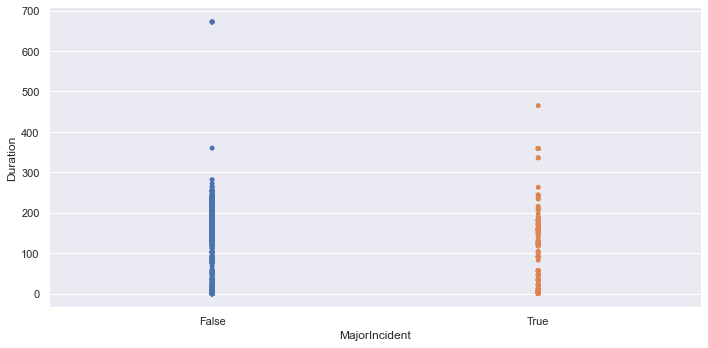

In [25]:
sns.set()
sns.catplot(x="MajorIncident", y="Duration", jitter=False,data=Features,aspect=2);

### 2.2 MajorIncident vs AcresBurned (Add Severity Element)

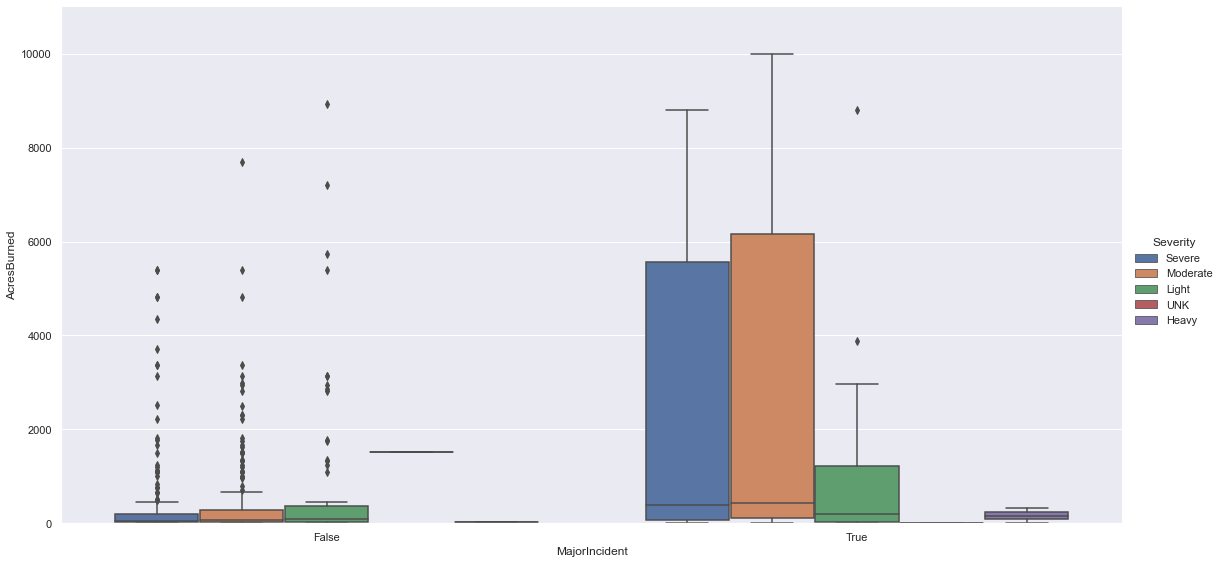

In [26]:
ax=sns.catplot(x="MajorIncident", y="AcresBurned",hue="Severity",kind='box',data=Features,height=8,aspect=2)
ax. set(ylim=(0, 11000));

### 2.3 Duration vs AcresBurned

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


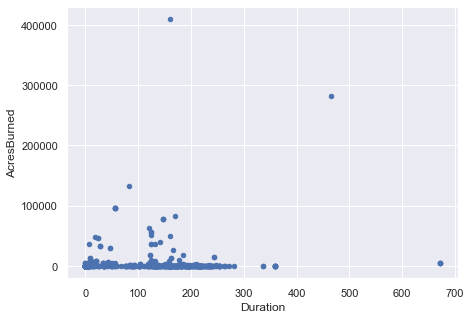

In [33]:
Features.plot.scatter(x='Duration', y='AcresBurned',marker='o', figsize=(7,5));

### 2.4 MajorIncident vs County

In [34]:
#!pip install Dexplot
import dexplot as dxp

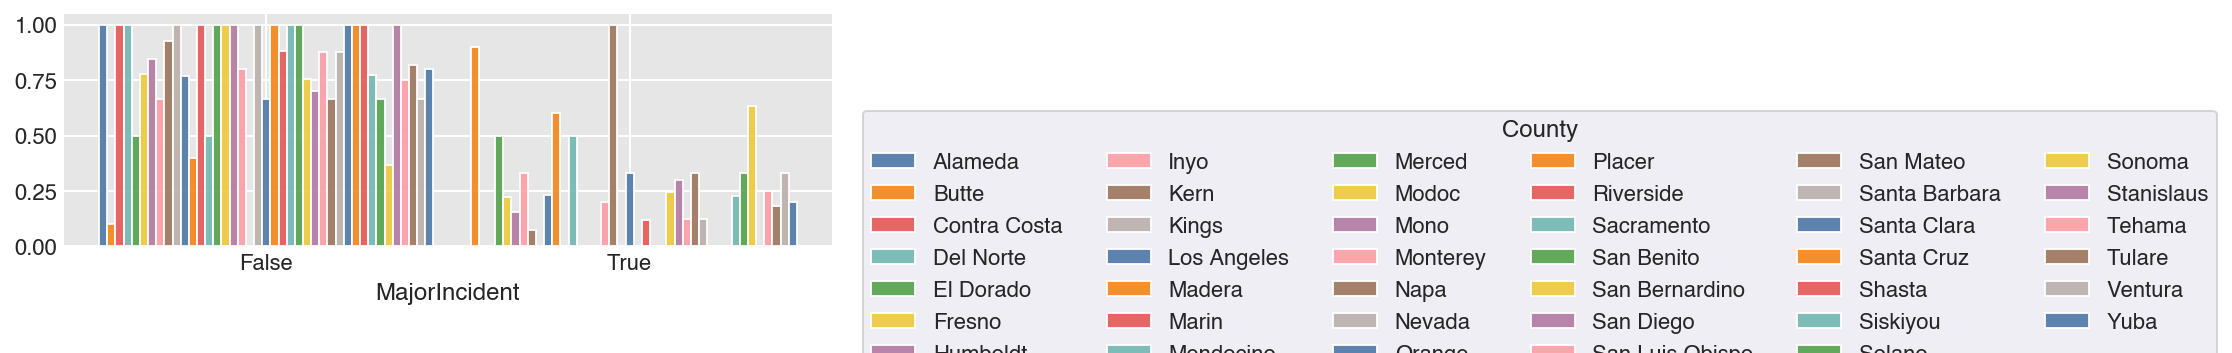

In [36]:
dxp.count('MajorIncident', data=Features, split='County', normalize='County')

### 2.5 MajorIncident vs Severity

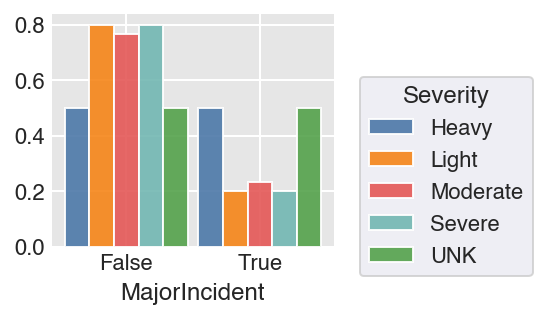

In [38]:
dxp.count('MajorIncident', data=Features, split='Severity', normalize='Severity')

### 2.6 MajorIncident vs Type

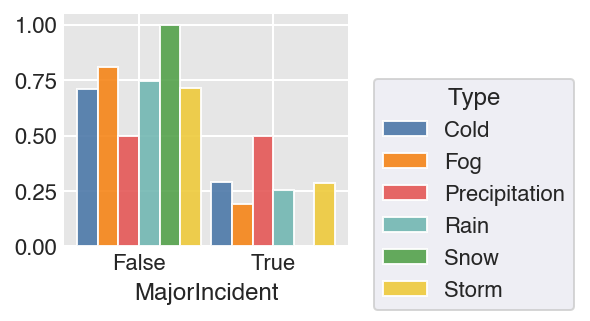

In [39]:
dxp.count('MajorIncident', data=Features, split='Type', normalize='Type')

It seems more likely to become major incidence in Precipitation days. 

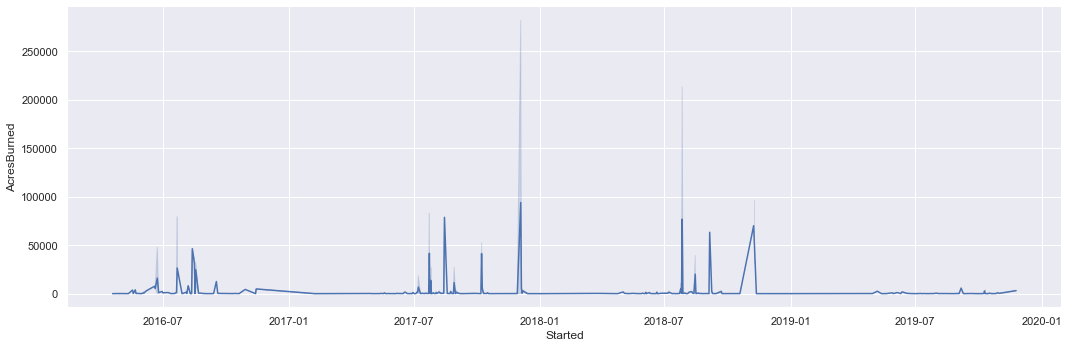

In [41]:
sns.set(font_scale=1)
g = sns.relplot(x="Started", y="AcresBurned", kind="line", data=data,aspect=3)
#g.figure.autofmt_xdate()

## 3. Initial model structure and Performance evaluation

### 3.1 Prepare the data 

In [42]:
pd.set_option("display.max_columns", None)
data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,County,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Duration,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),City
0,132127.0,False,US Forest Service - Los Padres National Forest,NaN,2016,True,/incidents/2016/7/22/soberanes-fire/,"As of August 26, CAL FIRE is no longer in unif...",NaN,Monterey,27,NaN,NaN,NaN,2016-10-13,NaN,False,True,NaN,NaN,NaN,36.45994,"Soberanes Creek, Garrapata State Park, Palo Co...",-121.89938,True,Soberanes Fire,100.0,NaN,True,"The Sobranes Fire started on July 22, 2016 ea...","east of Sobranes Creek, 5 miles south of Carm...",2016-07-22,Finalized,NaN,NaN,NaN,NaN,977ac7ce-4204-4cd3-9f89-727142165261,2016-10-13T11:30:00Z,NaN,83,W-5973892,Fog,Severe,2016-07-22,2016-07-22,Monterey
1,100.0,False,CAL FIRE San Benito-Monterey Unit,NaN,2016,True,/incidents/2016/7/22/bradley-fire/,NaN,NaN,Monterey,27,NaN,NaN,NaN,2016-07-23,NaN,False,True,NaN,NaN,NaN,35.85093,"off Highway 101 and San Antonio River, south o...",-120.81081,False,Bradley Fire,100.0,NaN,True,"The Bradley Fire started on July 22, 2016 off ...","off Highway 101 and San Antonio River, south o...",2016-07-22,Finalized,NaN,NaN,NaN,NaN,947aab39-3d8a-4841-8fc3-d129d8bbf6a3,2016-07-23T08:45:00Z,NaN,1,W-5973892,Fog,Severe,2016-07-22,2016-07-22,Monterey
2,48019.0,False,Bureau of Land Management,NaN,2016,True,/incidents/2016/6/23/erskine-fire/,NaN,NaN,Kern,15,NaN,NaN,NaN,2016-07-11,NaN,False,True,NaN,NaN,NaN,35.61150,Off Erskine Creek Rd in Lake Isabella,-118.45628,False,Erskine Fire,100.0,NaN,True,"The Erskine Fire started on June 23, 2016 off ...","Erskine Fire, Kern County, Lake Isabella, June...",2016-06-23,Finalized,NaN,NaN,NaN,NaN,91816ff6-d4ec-4f31-8d40-bf2538aca09b,2016-07-11T09:40:00Z,NaN,18,W-5819090,Storm,Severe,2016-06-23,2016-06-23,Mojave
3,46344.0,False,CAL FIRE San Luis Obispo Unit,NaN,2016,True,/incidents/2016/8/13/chimney-fire/,The Chimney fire is now fully contained. There...,All road closures have been lifted.,San Luis Obispo,40,NaN,NaN,NaN,2016-09-06,NaN,False,True,NaN,NaN,1.0,35.70595,Running Deer Rd & Chimney Rock Rd south of Lak...,-120.98316,True,Chimney Fire,100.0,NaN,True,"The Chimney Fire started on August 13, 2016 at...","Chimney Fire, San Luis Obispo County, Lake Nac...",2016-08-13,Finalized,8.0,70.0,NaN,NaN,040d03d0-fbdd-438c-8174-f81e4a1bba57,2016-09-06T07:30:00Z,NaN,24,W-3181178,Fog,Moderate,2016-08-13,2016-08-13,San Luis Obispo
4,46344.0,False,CAL FIRE San Luis Obispo Unit,NaN,2016,True,/incidents/2016/8/13/chimney-fire/,The Chimney fire is now fully contained. There...,All road closures have been lifted.,San Luis Obispo,40,NaN,NaN,NaN,2016-09-06,NaN,False,True,NaN,NaN,1.0,35.70595,Running Deer Rd & Chimney Rock Rd south of Lak...,-120.98316,True,Chimney Fire,100.0,NaN,True,"The Chimney Fire started on August 13, 2016 at...","Chimney Fire, San Luis Obispo County, Lake Nac...",2016-08-13,Finalized,8.0,70.0,NaN,NaN,040d03d0-fbdd-438c-8174-f81e4a1bba57,2016-09-06T07:30:00Z,NaN,24,W-6019289,Fog,Severe,2016-08-13,2016-08-13,San Simeon


In [43]:
data.shape

(702, 47)

In [45]:
data['MajorIncident']=data['MajorIncident'].astype(int)
data['MajorIncident']

0      1
1      0
2      0
3      1
4      1
      ..
697    0
698    0
699    0
700    0
701    0
Name: MajorIncident, Length: 702, dtype: int64

Let "feature" be the data set that contains only the variables we are interested in

In [115]:
feature = data[['MajorIncident','County', 'Started','Type', 'Severity','Duration']]
feature

,MajorIncident,County,Started,Type,Severity,Duration
0,1,Monterey,2016-07-22,Fog,Severe,83
1,0,Monterey,2016-07-22,Fog,Severe,1
2,0,Kern,2016-06-23,Storm,Severe,18
3,1,San Luis Obispo,2016-08-13,Fog,Moderate,24
4,1,San Luis Obispo,2016-08-13,Fog,Severe,24
...,...,...,...,...,...,...
697,0,San Bernardino,2019-10-21,Fog,Severe,1
698,0,San Bernardino,2019-10-21,Fog,Moderate,1
699,0,San Diego,2019-10-15,Fog,Severe,1
700,0,San Diego,2019-10-15,Fog,Moderate,1


In [116]:
feature = feature.drop(columns=['Started'])
feature

,MajorIncident,County,Type,Severity,Duration
0,1,Monterey,Fog,Severe,83
1,0,Monterey,Fog,Severe,1
2,0,Kern,Storm,Severe,18
3,1,San Luis Obispo,Fog,Moderate,24
4,1,San Luis Obispo,Fog,Severe,24
...,...,...,...,...,...
697,0,San Bernardino,Fog,Severe,1
698,0,San Bernardino,Fog,Moderate,1
699,0,San Diego,Fog,Severe,1
700,0,San Diego,Fog,Moderate,1


In [117]:
feature = pd.get_dummies(feature)
feature

,MajorIncident,Duration,County_Alameda,County_Butte,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,County_Humboldt,County_Inyo,County_Kern,County_Kings,County_Los Angeles,County_Madera,County_Marin,County_Mendocino,County_Merced,County_Modoc,County_Mono,County_Monterey,County_Napa,County_Nevada,County_Orange,County_Placer,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Tulare,County_Ventura,County_Yuba,Type_Cold,Type_Fog,Type_Precipitation,Type_Rain,Type_Snow,Type_Storm,Severity_Heavy,Severity_Light,Severity_Moderate,Severity_Severe,Severity_UNK
0,1,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
698,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
699,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


Split data into training and test sets. Let 30% of the data in the test set, 70% in the training set

In [118]:
from sklearn.model_selection import train_test_split

feature_train, feature_test = train_test_split(feature, test_size=0.3, random_state=88)
feature_train.shape, feature_test.shape

((491, 54), (211, 54))

### 3.2 CART model
#### Build the Classification Tree Model and fit it with training set

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train = feature_train.drop(['MajorIncident'], axis=1)
y_train = feature_train['MajorIncident']
X_test = feature_test.drop(['MajorIncident'], axis=1)
y_test = feature_test['MajorIncident']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 53), (491,), (211, 53), (211,))

#### Cross-validation with Custom Loss Function

In [145]:
grid_values = {'ccp_alpha': np.linspace(0.0, 0.02, 201), 
               'min_samples_leaf': [2,3,4,5], 
               'min_samples_split': [10],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 5}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier() 
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1)                                                     
dtc_cv_acc.fit(X_train, y_train)

acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

Fitting 10 folds for each of 804 candidates, totalling 8040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8040 out of 8040 | elapsed:   51.2s finished


#### Plot the graph - average loss v.s. ccp alpha 

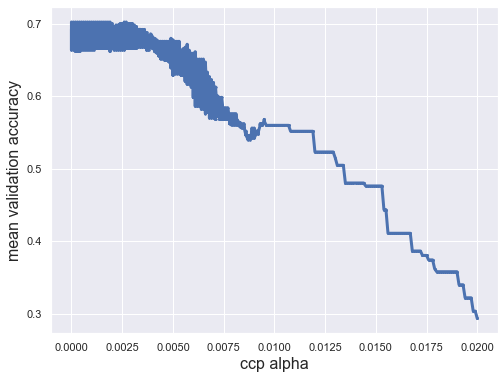

In [146]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [147]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best parameter min_samples_leaf (max. accuracy): ', dtc_cv_acc.best_params_['min_samples_leaf'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best parameter min_samples_leaf (max. accuracy):  2
Grid best score (accuracy):  0.7026938775510203


#### Use the best ccp_alpha and min_samples_leaf to do the CART model

Node count = 135


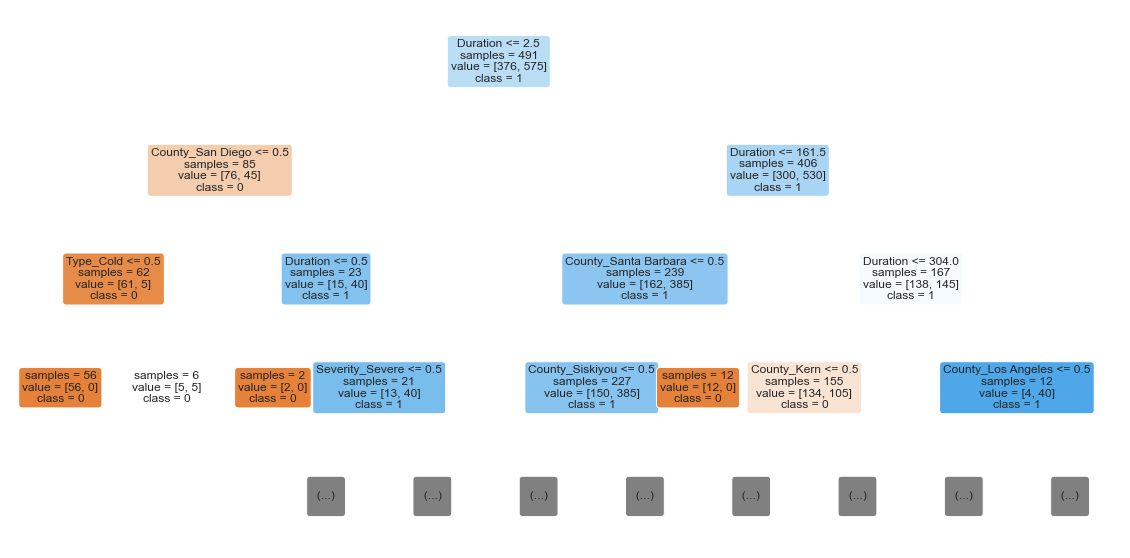

In [148]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

#### Prediction and Perfomance 

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_cart = dtc_cv_acc.best_estimator_.predict(X_test)
dtc_cm = confusion_matrix(y_test, y_pred_cart)
tpr_dtc = dtc_cm.ravel()[3]/(dtc_cm.ravel()[2]+dtc_cm.ravel()[3])
fpr_dtc = dtc_cm.ravel()[1]/(dtc_cm.ravel()[0]+dtc_cm.ravel()[1])

print ("Confusion Matrix : \n", dtc_cm)
print ("\nCART Accuracy:", accuracy_score(y_test, y_pred_cart))
print('TPR_cart: ', round(tpr_dtc,4))
print('FPR_cart: ', round(fpr_dtc,4))

Confusion Matrix : 
 [[120  53]
 [ 10  28]]

CART Accuracy: 0.7014218009478673
TPR_cart:  0.7368
FPR_cart:  0.3064


### 3.3 Random Forest model
#### Build the model with CV

In [168]:
from sklearn.ensemble import RandomForestClassifier

import time

grid_values = {'max_features': np.linspace(1,21,5, dtype='int32'),
               'min_samples_leaf': [2],
               'n_estimators': [200],
               'class_weight' : [{0: 1, 1: 5}],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=10)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 13.17 s


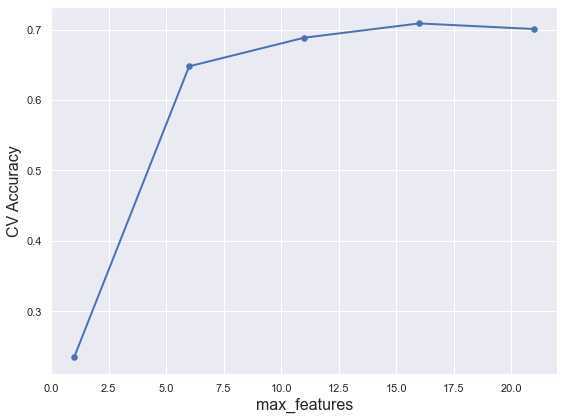

In [169]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=30)
plt.plot(max_features, ACC_scores, linewidth=2)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [170]:
print(rf_cv.best_params_)

{'class_weight': {0: 1, 1: 5}, 'max_features': 16, 'min_samples_leaf': 2, 'n_estimators': 200, 'random_state': 88}


#### Prediction and Performance 

In [171]:
y_pred_rf = rf_cv.predict(X_test)

rf_cm = confusion_matrix(y_test, y_pred_rf)

tpr_rf = rf_cm.ravel()[3]/(rf_cm.ravel()[2]+rf_cm.ravel()[3])
fpr_rf = rf_cm.ravel()[1]/(rf_cm.ravel()[0]+rf_cm.ravel()[1])

print ("Confusion Matrix : \n", rf_cm)
print ("\nCART Accuracy:", accuracy_score(y_test, y_pred_rf))
print('TPR_rf: ', round(tpr_rf,4))
print('FPR_rf: ', round(fpr_rf,4))

Confusion Matrix : 
 [[135  38]
 [ 15  23]]

CART Accuracy: 0.7488151658767772
TPR_rf:  0.6053
FPR_rf:  0.2197


### 3.4 Bagging with CV
#### Build Model

In [173]:
grid_values = {'max_features':[5,7,9,11],
               'n_estimators': [100,500,1000],
               'class_weight' : [{0: 1, 1: 5}],
               'max_leaf_nodes': [5,10,15,20]} 

bag = RandomForestClassifier()
bag_cv = GridSearchCV(bag, param_grid=grid_values, cv=5)
bag_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 5}],
                         'max_features': [5, 7, 9, 11],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'n_estimators': [100, 500, 1000]})

In [174]:
print(bag_cv.best_params_)

{'class_weight': {0: 1, 1: 5}, 'max_features': 11, 'max_leaf_nodes': 20, 'n_estimators': 100}


#### Prediction and Performance 

In [180]:
y_pred_bag = bag_cv.predict(X_test)
bag_cm = confusion_matrix(y_test, y_pred_bag)
tpr_bag = bag_cm.ravel()[3]/(bag_cm.ravel()[2]+bag_cm.ravel()[3])
fpr_bag = bag_cm.ravel()[1]/(bag_cm.ravel()[0]+bag_cm.ravel()[1])
print ("Confusion Matrix: \n", bag_cm)
print ("\nBagging with CV Accuracy:", accuracy_score(y_test, y_pred_bag))
print('TPR_bag: ', round(tpr_bag,4))
print('FPR_bag: ', round(fpr_bag,4))

Confusion Matrix: 
 [[106  67]
 [  8  30]]

Bagging with CV Accuracy: 0.6445497630331753
TPR_bag:  0.7895
FPR_bag:  0.3873


### 3.5 Boosting with CV
#### Build model 

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
grid_values = {'n_estimators': [100,500,1000,2000],
               'learning_rate': [0.1,0.3,0.5,0.7],
               'max_leaf_nodes': [3,5,7,9,11]} 

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_leaf_nodes': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 500, 1000, 2000]})

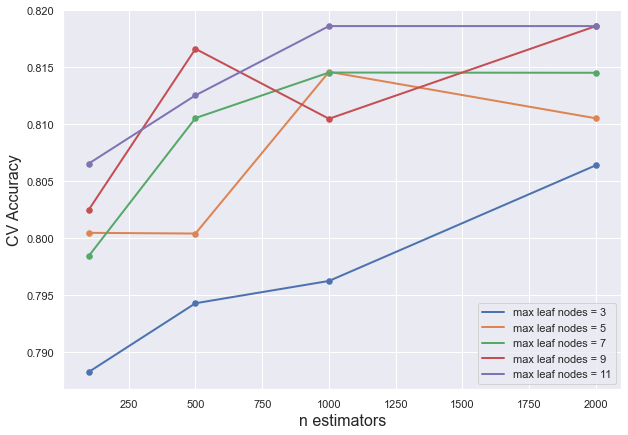

Best parameters {'learning_rate': 0.7, 'max_leaf_nodes': 7, 'n_estimators': 1000}


In [191]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
ACC_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(10, 7))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], ACC_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], ACC_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()
print('Best parameters', gbc_cv.best_params_)

In [192]:
y_pred_gbc = gbc_cv.predict(X_test)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
tpr_gbc = cm_gbc.ravel()[3]/(cm_gbc.ravel()[2]+cm_gbc.ravel()[3])
fpr_gbc = cm_gbc.ravel()[1]/(cm_gbc.ravel()[0]+cm_gbc.ravel()[1])
print ("Confusion Matrix: \n", cm_gbc)
print ("\nGradient Boosting with CV Accuracy:", accuracy_score(y_test, y_pred_gbc))
print('TPR_boosting: ', round(tpr_gbc,4))
print('FPR_boosting: ', round(fpr_gbc,4))

Confusion Matrix: 
 [[156  17]
 [ 15  23]]

Gradient Boosting with CV Accuracy: 0.8483412322274881
TPR_boosting:  0.6053
FPR_boosting:  0.0983


## 4. Compare Model Performance

In [193]:
comparison_data = {'Decision Tree Classifier': ['{:.3f}'.format(dtc_cv_acc.best_score_),
                                                '{:.3f}'.format(tpr_dtc),
                                                '{:.3f}'.format(fpr_dtc)
                                               ],
                   'Random Forest': ['{:.3f}'.format(accuracy_score(y_test, y_pred_rf)),
                                     '{:.3f}'.format(tpr_rf),
                                     '{:.3f}'.format(fpr_rf)
                                    ],
                   'Bagging Random Forest': ['{:.3f}'.format(accuracy_score(y_test, y_pred_bag)),
                                             '{:.3f}'.format(tpr_bag),
                                             '{:.3f}'.format(fpr_bag)
                                            ],
                   'Gradient Boosted Trees': ['{:.3f}'.format(accuracy_score(y_test, y_pred_gbc)),
                                              '{:.3f}'.format(tpr_gbc),
                                              '{:.3f}'.format(fpr_gbc)
                                             ]}
                   

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy','TPR','FPR'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Decision Tree Classifier,Random Forest,Bagging Random Forest,Gradient Boosted Trees
Accuracy,0.703,0.749,0.645,0.848
TPR,0.737,0.605,0.789,0.605
FPR,0.306,0.220,0.387,0.098
